#**The Sparks Foundation GRIP Internship Task 2**

##**Prediction using Unsupervised Machine Learning**
**(Level - Beginner)**

Author: **Arnab Chakraborty** (*Data Science and Business Analytics Intern at The Sparks Foundation*) 

LinkedIn Profile: https://www.linkedin.com/in/arnab-chakraborty27/







# **Problem Statement**

From the given `Iris Dataset`, predict the Optimum Number of Clusters and represent them visually.

Dataset: https://bit.ly/3kXTdox

**Importing Necessary Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
%matplotlib inline

**Importing the IRIS Dataset**

In [2]:
df = pd.read_csv('/content/Iris.csv', index_col=False)

**Exploring The Data**

In [3]:
df.set_index('Id', inplace=True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [6]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df.dtypes.value_counts()

float64    4
object     1
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc4347cc0d0>,
      dtype=object)

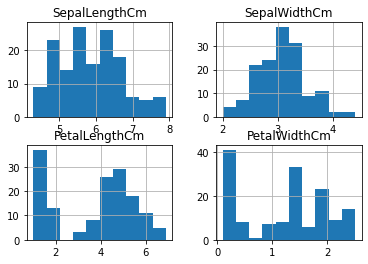

In [8]:
df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].hist()

**Visualizing the Data**

Text(0, 0.5, 'Width(cm)')

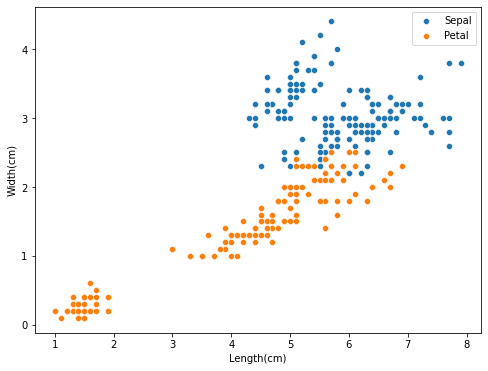

In [9]:
fig = plt.figure(1, figsize=(8,6))
sns.scatterplot(x='SepalLengthCm', y ='SepalWidthCm', data=df, label='Sepal')
sns.scatterplot(x='PetalLengthCm', y ='PetalWidthCm', data=df, label='Petal')
plt.xlabel('Length(cm)')
plt.ylabel('Width(cm)')

In [10]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


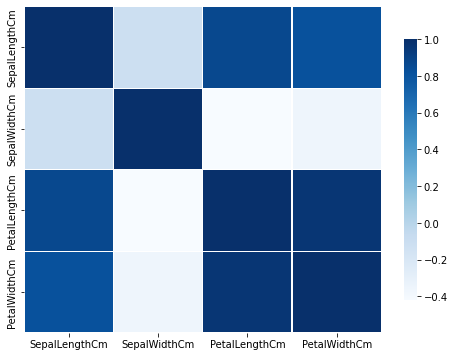

In [11]:
fig = plt.figure(1, figsize=(8, 6))
sns.heatmap(df.corr(),cmap="Blues", linewidth=0.3, cbar_kws={"shrink":.8})

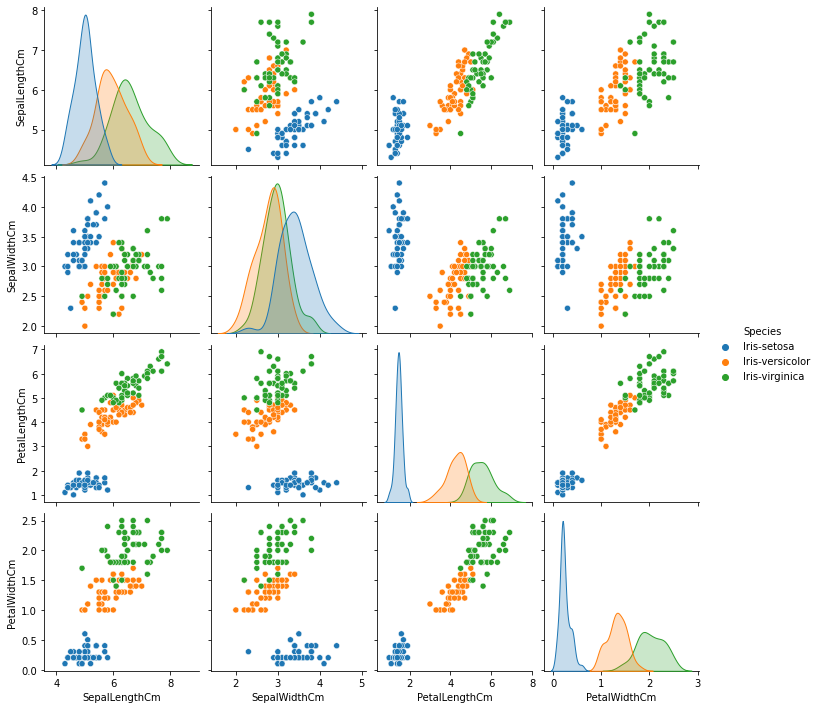

In [12]:
sns.pairplot(df, hue='Species')

In [13]:
x = df.iloc[:, [0, 1, 2, 3]].values
sse = []
k_rng = range(1,11)
for k in k_rng:
    km = KMeans(n_clusters=k, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    sse.append(km.inertia_)

Text(0, 0.5, 'Sum of Squared Error')

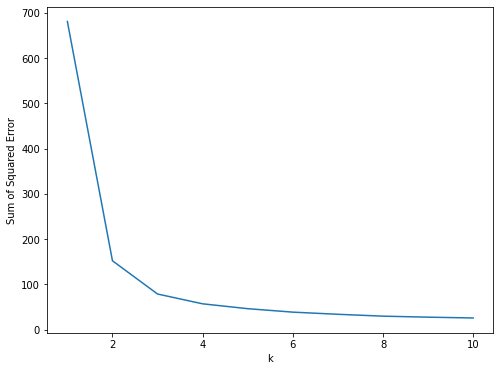

In [14]:
fig = plt.figure(1, figsize=(8, 6))
plt.plot(k_rng, sse)
plt.xlabel('k')
plt.ylabel('Sum of Squared Error')

**Applying KMeans Clustering**

In [15]:
km = KMeans(n_clusters=3)
km_pred = km.fit_predict(x)
km_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [16]:
km.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

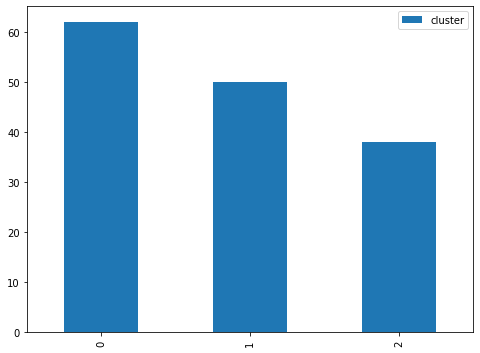

In [17]:
df['cluster'] = km_pred
fig = plt.figure(1, figsize=(8, 6))
df['cluster'].value_counts().plot(kind='bar')
plt.legend()

In [18]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
Id,,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa,1
2,4.9,3.0,1.4,0.2,Iris-setosa,1
3,4.7,3.2,1.3,0.2,Iris-setosa,1
4,4.6,3.1,1.5,0.2,Iris-setosa,1
5,5.0,3.6,1.4,0.2,Iris-setosa,1


**Visualizing Clusters and their Centroids**

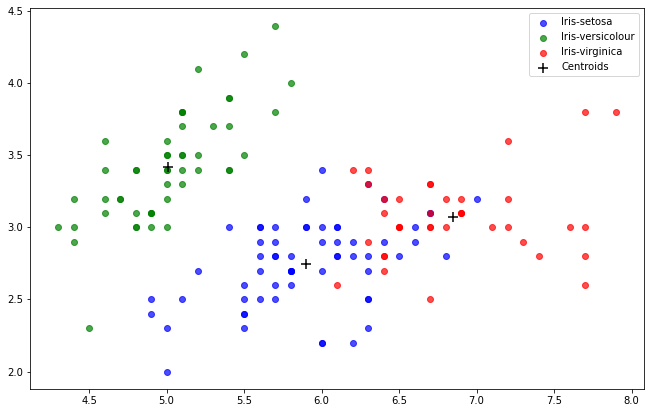

In [19]:
fig = plt.figure(1, figsize=(11, 7))
plt.scatter(x[km_pred == 0, 0], x[km_pred == 0, 1], alpha=0.7, label = 'Iris-setosa', color='blue')
plt.scatter(x[km_pred == 1, 0], x[km_pred == 1, 1], alpha=0.7, label = 'Iris-versicolour', color='green')
plt.scatter(x[km_pred == 2, 0], x[km_pred == 2, 1], alpha=0.7, label = 'Iris-virginica', color='red')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], s = 100, marker='+', c='black', label = 'Centroids')
plt.legend()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:794: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if zdir == 'x':
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:796: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir == 'y':


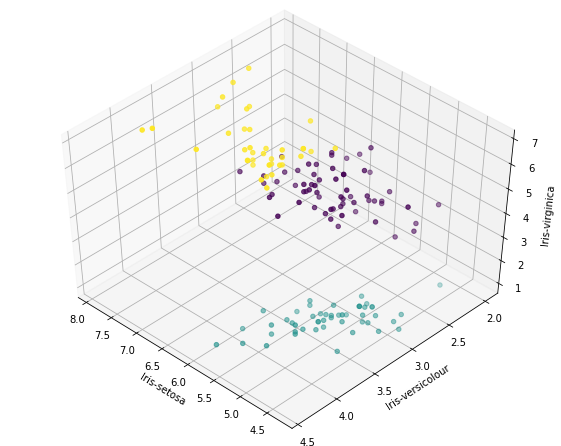

In [20]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
plt.cla()
ax.set_xlabel('Iris-setosa')
ax.set_ylabel('Iris-versicolour')
ax.set_zlabel('Iris-virginica')
ax.scatter(x[:, 0], x[:, 1], x[:, 2], x[:,3], c= km_pred.astype(np.float))

# **We can conclude that the optimum number of Clusters for the Iris dataset is `3`**